<a href="https://www.kaggle.com/code/jayaprakash26/house-price-prediction-linear-regression-rfe?scriptVersionId=134275323" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Price Prediction

# Problem Statement:

A real estate company has the data of real estate prices in Delhi. The company wants to optimise the selling price of the properties, based on important factors such as area, bedrooms, parking, etc.

**The company wants:**

* To identify the variables affecting house prices, e.g., area, number of rooms, bathrooms, etc.
* To create a linear model that quantitatively relates house prices with variables, such as the number of rooms, area, number of bathrooms, etc.
* To know the accuracy of the model, i.e. how well do these variables predict the house prices

# Step1: Reading and understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
housing = pd.read_csv('../input/housing/Housing (1).csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.shape

(545, 13)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#we have 545 rows and 13 columns
#No missing values
#price is the target variable
#as predictor variables, we have both categorical and Numeric columns

In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


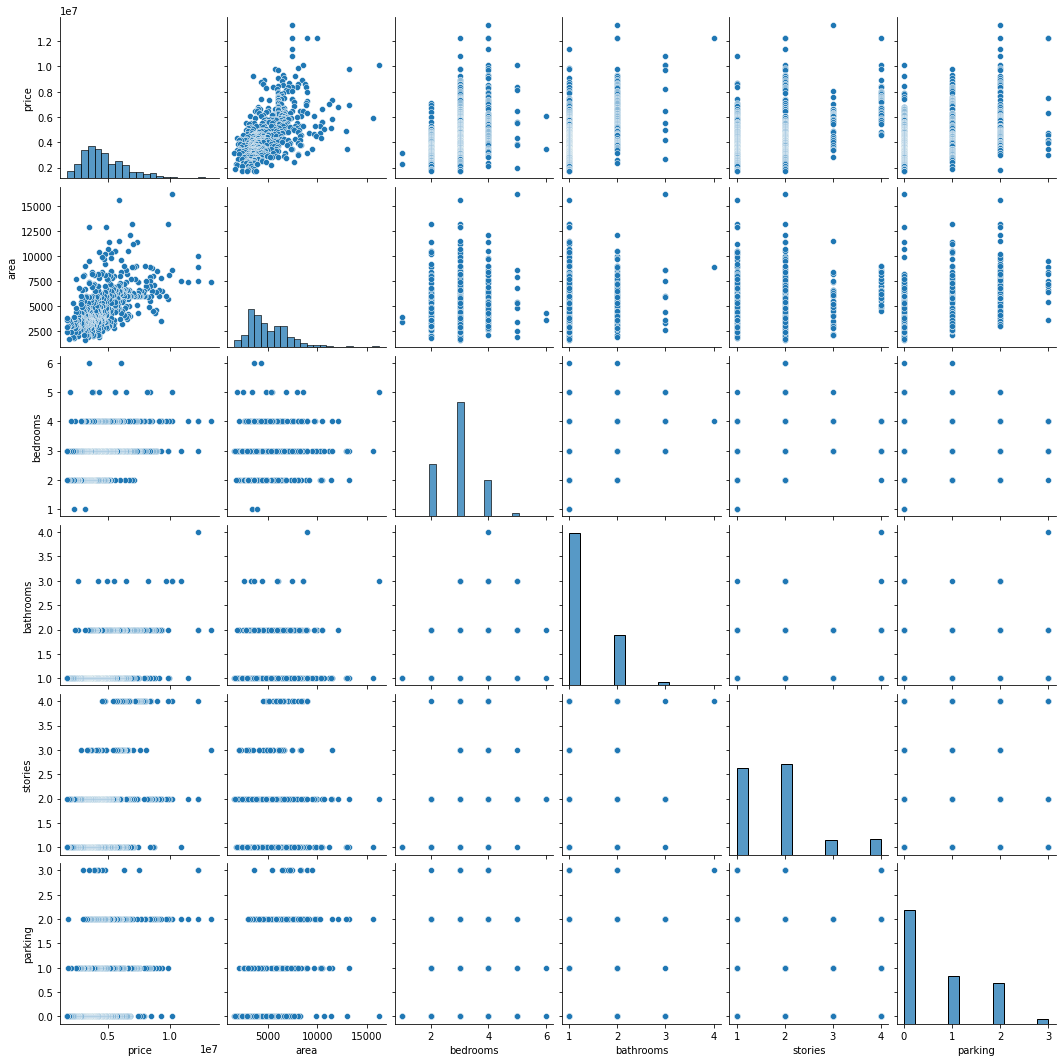

In [7]:
#Visualizing data using pairplot
sns.pairplot(housing)
plt.show()

<AxesSubplot:xlabel='furnishingstatus', ylabel='price'>

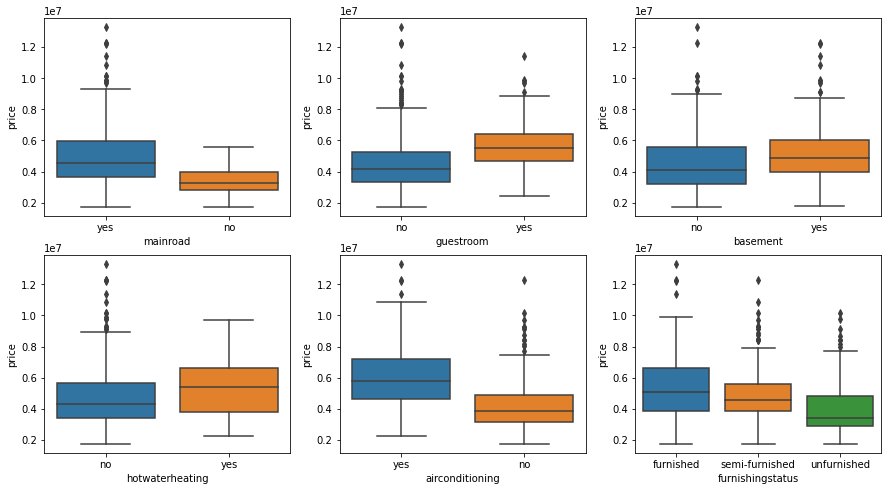

In [8]:
#visualising Categorical variables
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad', y='price', data=housing)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom', y='price', data=housing)
plt.subplot(2,3,3)
sns.boxplot(x='basement', y='price', data=housing)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=housing)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning', y='price', data=housing)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus', y='price', data=housing)

In [9]:
#houses located on mainroad have significantly high prices
#same with guestroom, hotwaterheating, airconditioning, furnished and semifurnished have siginificantly have high prices

# Step2: Data Preparation for Modelling

In [10]:
#Encoding: converting binary categorical variables 1 and 0

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

housing[varlist]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [11]:
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes':1, 'no':0}))
housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [12]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


#all variables are numeric except furnishing

#since furnishing has 3 levels within, let's create dummy variable out of it

**Dummy Variables**

In [13]:
#Creating dummy variable and dropping the redundant 
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [14]:
#concatinating both status and housing dataset

housing = pd.concat([housing,status],axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [15]:
housing = housing.drop('furnishingstatus',axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# **Splitting into train-test**

In [16]:
df_train, df_test = train_test_split(housing, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


# **Rescaling the Features** - Min-Max Scaling

Rescaling is done, since variables are at different scales (ex: area is in different scale and price is in different scale....)

In [17]:
scaler = MinMaxScaler()
#create a list of numeric variables, since our categorical variables were already converted to binary form and not necessary to do Min_maxscaling on them

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


# Step3: Training the Model

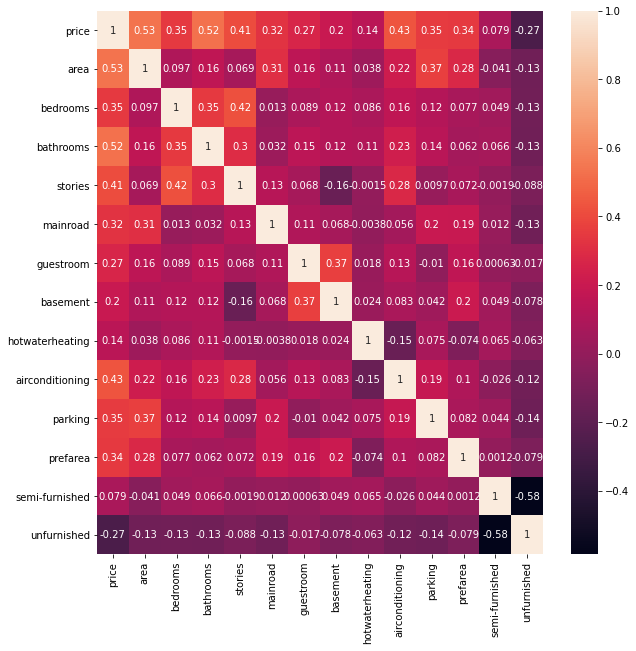

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [19]:
y_train = df_train.pop('price')
X_train = df_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


# RFE - Recursive feature elimination

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

In [21]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [22]:
X_train.columns[rfe.support_]

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [23]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0


In [24]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

**Model 1**

In [25]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.28e-82
Time:                        16:30:36   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018     

p-value of bedrooms seems significantly higher, hence will drop as it is insignificant in the presence of other variables

In [26]:
X_train_rfe = X_train_rfe.drop(['bedrooms'], axis=1)

In [27]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           6.67e-83
Time:                        16:30:36   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013     

In [28]:
checkVIF(X_train_new)

,Features,VIF
0,const,8.18
1,area,1.36
7,airconditioning,1.23
8,parking,1.22
2,bathrooms,1.19
3,stories,1.19
4,mainroad,1.16
9,prefarea,1.13
5,guestroom,1.08
6,hotwaterheating,1.07


# Residual Analysis

In [29]:
lm = sm.OLS(y_train, X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

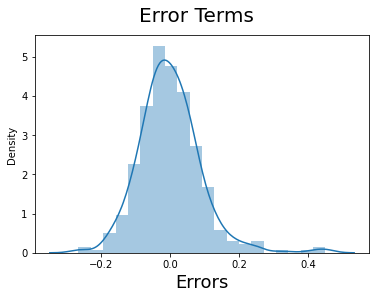

In [30]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Error terms seem to be approximately normally distributed, so the assumption of the linear model seems to be fulfilled

# Making Prediction and Evaluation

In [31]:
#Applying the scaling on test sets
num_vars= ['area', 'bedrooms','bathrooms', 'stories', 'parking', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [32]:
#dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [33]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [34]:
#Making Predictions
y_pred=lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

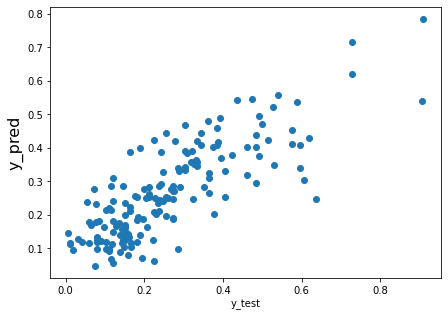

In [35]:
plt.figure(figsize=[7,5])
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) #plot heading
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=16)

In [36]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           6.67e-83
Time:                        16:30:38   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013     

**Inference:**

* R-sqaured and Adjusted R-squared (extent of fit) - 0.66 and 0.65 - 66% variance explained.
* F-stats and Prob(F-stats) (overall model fit) - 82.37 and 6.67e-83(approx. 0.0) - Model fit is significant and explained 66% variance is just not by chance.
* p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.